In [201]:
from myclasses.sql_executor import SQLExecutor

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT * FROM Master WHERE state = 'fl' AND net_income < 3000000 
            AND net_income > -3000000
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   prov_id                      4379 non-null   object 
 1   year                         4379 non-null   int64  
 2   ownership                    4379 non-null   object 
 3   chow_last_12mos              4379 non-null   object 
 4   state                        4379 non-null   object 
 5   city                         4379 non-null   object 
 6   county_ssa                   4379 non-null   float64
 7   zip                          4379 non-null   object 
 8   loc_type                     4378 non-null   object 
 9   has_outpatient               4379 non-null   object 
 10  num_beds                     4379 non-null   float64
 11  snf_num_beds                 4379 non-null   float64
 12  snf_admis_tot                4371 non-null   float64
 13  tot_days          

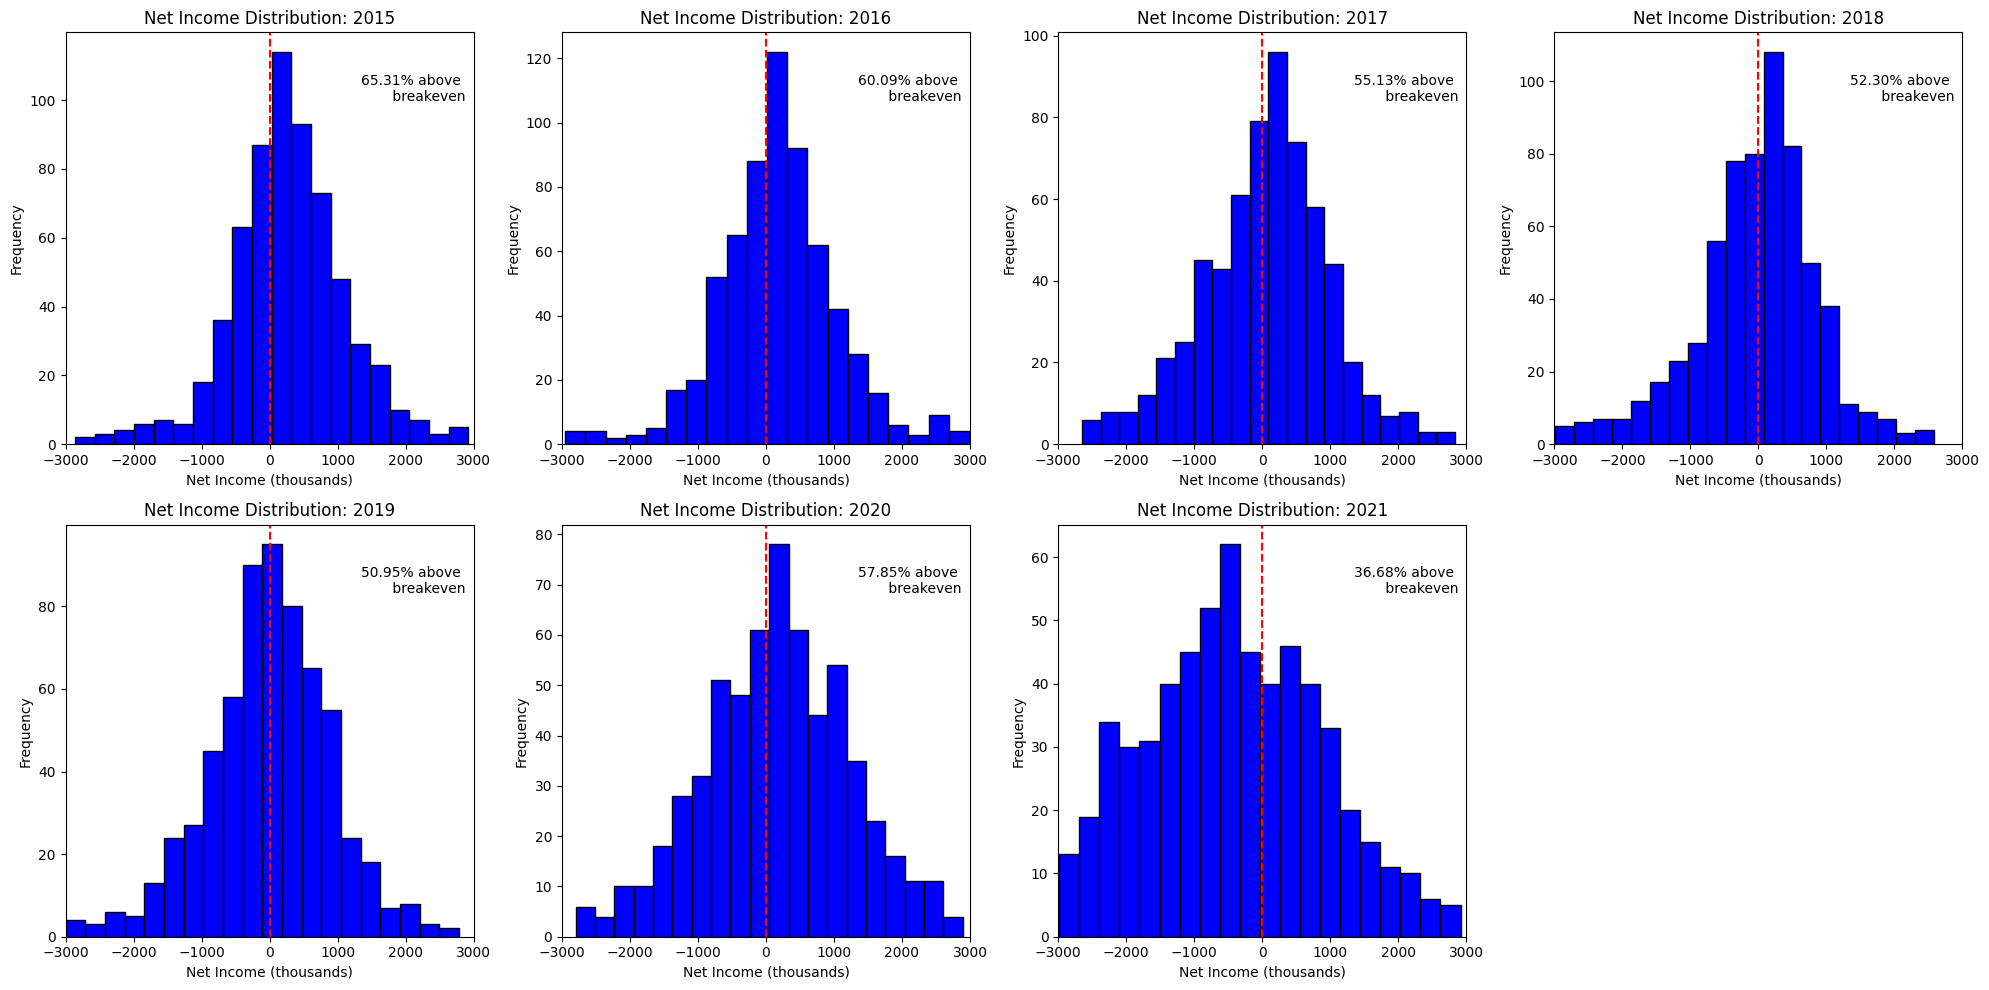

In [202]:
import matplotlib.pyplot as plt

net_income = df[['year','net_income']]
net_income_dict = {}

for fiscal_year, group_data in net_income.groupby('year'):

    # Extract net_income values and convert to a list
    net_income_dict[fiscal_year] = group_data['net_income'].dropna().tolist()


# Filter out fiscal year 2022
net_income_filtered_dict = {fiscal_year: net_income_list for fiscal_year, net_income_list in net_income_dict.items() if fiscal_year != 2022}

# Create a figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate over the filtered dictionary items and enumerate to get both index and data
for idx, (fiscal_year, net_income_list) in enumerate(net_income_filtered_dict.items()):
    if idx >= 8:  # Limit to the first 8 fiscal years
        break
    
    # Divide net income values by a thousand
    net_income_list = [income / 1000 for income in net_income_list]
    
    # Calculate the position in the grid
    row = idx // 4
    col = idx % 4
    
    # Create a histogram for the current fiscal year in the appropriate subplot
    axs[row, col].hist(net_income_list, bins=20, color='blue', edgecolor='black')
    axs[row, col].set_title(f'Net Income Distribution: {fiscal_year}')
    axs[row, col].set_xlabel('Net Income (thousands)')
    axs[row, col].set_ylabel('Frequency')
    
    # Center x-axis at 0
    axs[row, col].set_xlim(-3000, 3000)
    
    # Draw dotted line at x=0
    axs[row, col].axvline(x=0, color='red', linestyle='--')
    axs[row, col].grid(False)
    
    # Calculate percentage of data above 0
    data_above_zero = sum(x > 0 for x in net_income_list)
    total_data_points = len(net_income_list)
    percentage_above_zero = (data_above_zero / total_data_points) * 100
    
    # Annotate plot with percentage above 0
    axs[row, col].annotate(f"{percentage_above_zero:.2f}% above \n breakeven", xy=(0.98, 0.9), xycoords='axes fraction', ha='right', va='top')

# Set the 8th subplot as None (empty space)
axs[1, 3].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

plt.show()

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

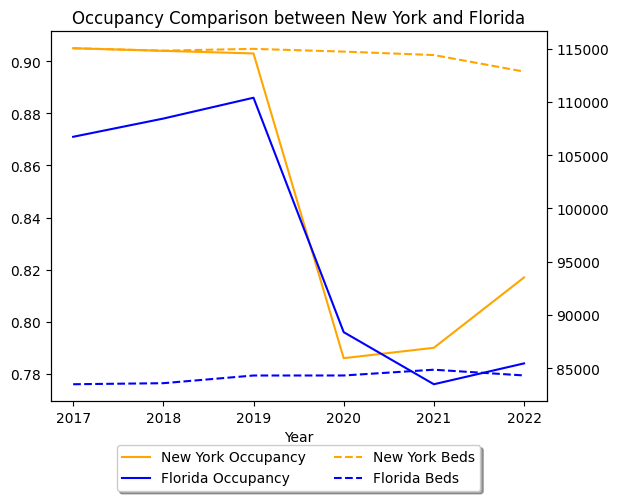

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Data
ny = [.905, .904, .903, .786, .79, .817]
fl = [.871, .878, .886, .796, .776, .784]
nybeds = [115026, 114800, 114968, 114711, 114387, 112836]
flbeds = [83515, 83613, 84334, 84336, 84878, 84340]

# X-axis values (assuming each data point is one year)
years = np.arange(2017, 2023)

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot lines for revenue
ny_line, = ax1.plot(years, ny, color='orange', label='New York')
fl_line, = ax1.plot(years, fl, color='blue', label='Florida')

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_title('Occupancy Comparison between New York and Florida')

# Create a second y-axis for beds
ax2 = ax1.twinx()
nybeds_line, = ax2.plot(years, nybeds, linestyle='--', color='orange', label='NY Beds')
flbeds_line, = ax2.plot(years, flbeds, linestyle='--', color='blue', label='FL Beds')

# Set y-axis label underneath the first one
ax2.yaxis.set_label_position('left')

# Custom legend
custom_legend = plt.legend(handles=[ny_line, fl_line, nybeds_line, flbeds_line],
                           labels=['New York Occupancy', 'Florida Occupancy', 'New York Beds', 'Florida Beds'],
                           loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

# Add the legend manually to the current Axes
ax1.add_artist(custom_legend)

# Show plot
plt.show()

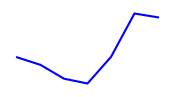

In [ ]:
import numpy as np

# Calculate mean net income for each fiscal year
mean_net_income_by_year = {fiscal_year: np.mean(net_income_list) for fiscal_year, net_income_list in net_income_filtered_dict.items()}
years = list(mean_net_income_by_year.keys())
mean_incomes = list(mean_net_income_by_year.values())

# Plot the trend line only
plt.figure(figsize=(2, 1))
plt.plot(years, mean_incomes, color='blue', linewidth=1.5, label='Mean Income')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(False)  # Hide left spine
plt.legend().set_visible(False)  # Hide legend
plt.show()

/tmp/ipykernel_9298/3239483197.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["net_income_per_bed"] = df_2020["net_income"] / df_2020["num_beds"]


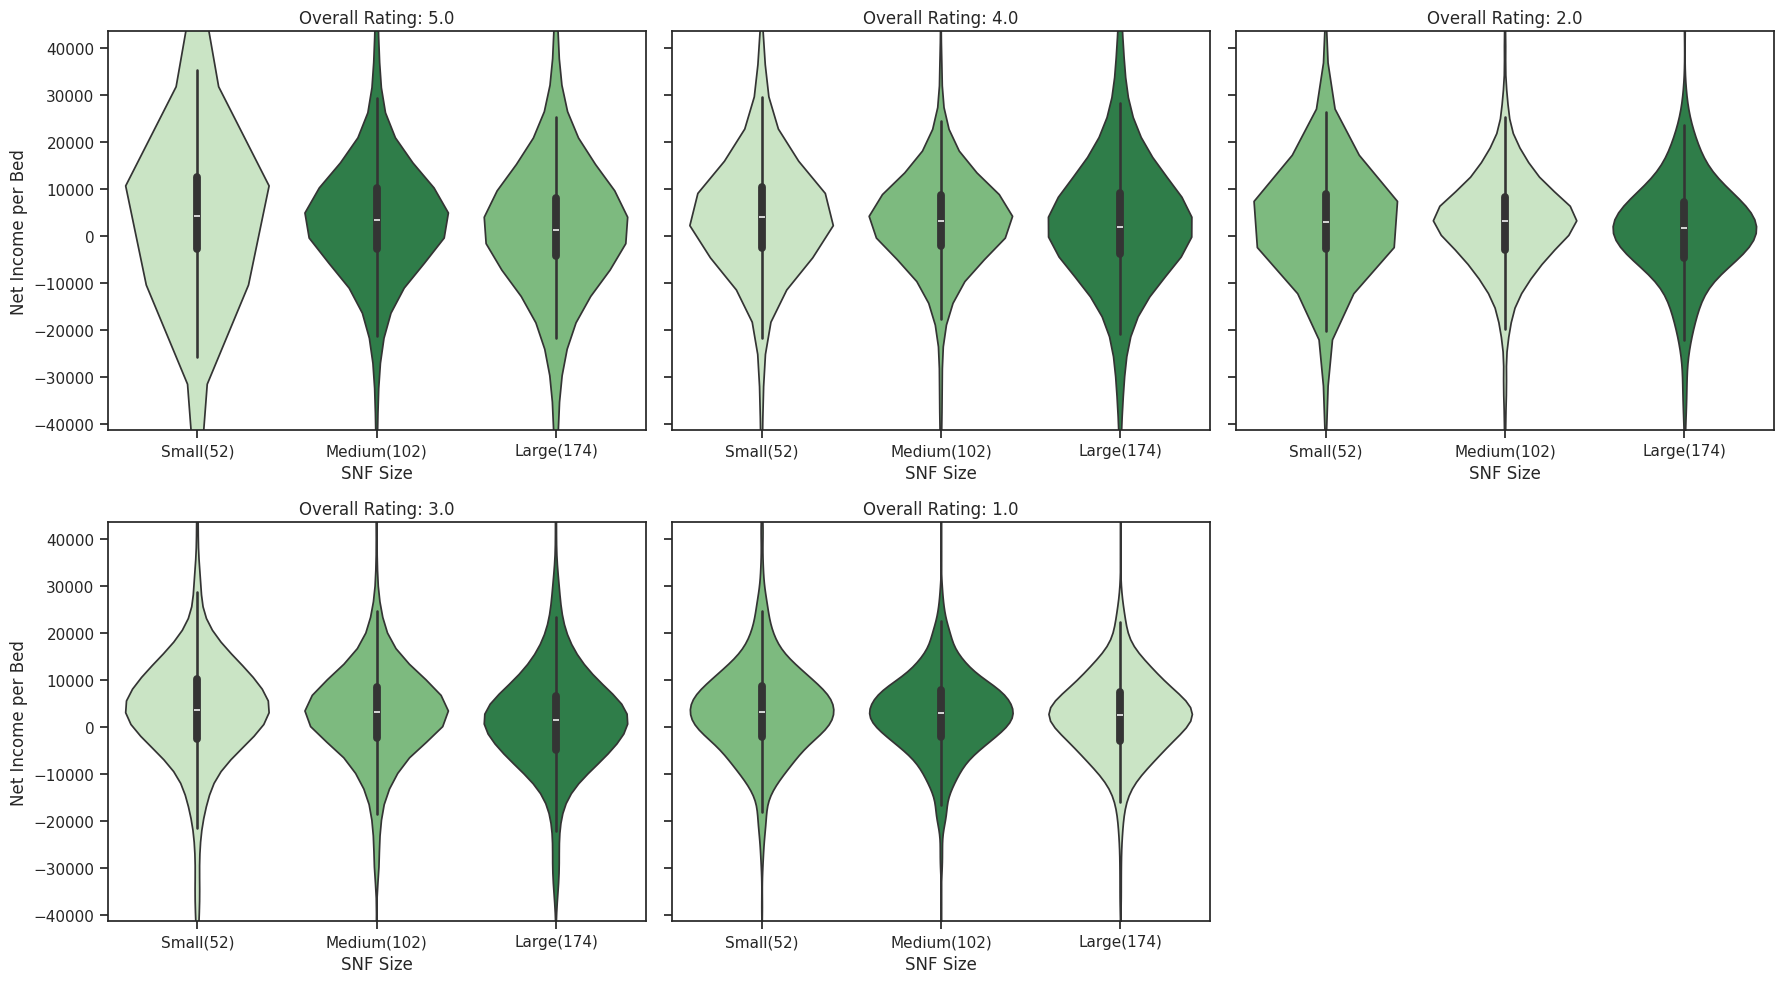

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(style="ticks")

# Define a greenish color palette
redish_palette = sns.color_palette("Reds", 3)

# Filter the DataFrame for fiscal year 2020
df_2020 = df.loc[df['fiscal_year'] == 2020]

# Calculate net income per bed for fiscal year 2020
df_2020["net_income_per_bed"] = df_2020["net_income"] / df_2020["num_beds"]

# Determine the number of unique ratings
unique_ratings = df["overall_rating"].unique()
num_ratings = len(unique_ratings)

# Calculate the number of rows required based on the number of ratings and desired columns
num_rows = math.ceil(num_ratings / 3)

# Define the order of SNF sizes
snf_size_order = ["Small(52)", "Medium(102)", "Large(174)"]

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows*5), sharey=True)

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over ratings and create a violin plot for each
for i, rating in enumerate(unique_ratings):
    row = i // 3
    col = i % 3
    rating_df = df_2020[df_2020["overall_rating"] == rating]
    sns.violinplot(x="snf_size", y="net_income_per_bed", data=rating_df, ax=axes[row, col], hue="snf_size", palette=redish_palette, legend=False, bw_method="silverman", cut=0, order=snf_size_order)
    axes[row, col].set_title(f"Overall Rating: {rating}")
    axes[row, col].set_xlabel("SNF Size")
    axes[row, col].set_ylabel("Net Income per Bed")
    
    # Set y-axis limits
    # Here you can adjust the limits according to your preference
    # This example sets the y-axis limits to the 5th and 95th percentiles of the data
    ylim_min = rating_df["net_income_per_bed"].quantile(0.001)
    ylim_max = rating_df["net_income_per_bed"].quantile(0.999)
    axes[row, col].set_ylim(ylim_min, ylim_max)

# Hide empty subplots
for i in range(num_ratings, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



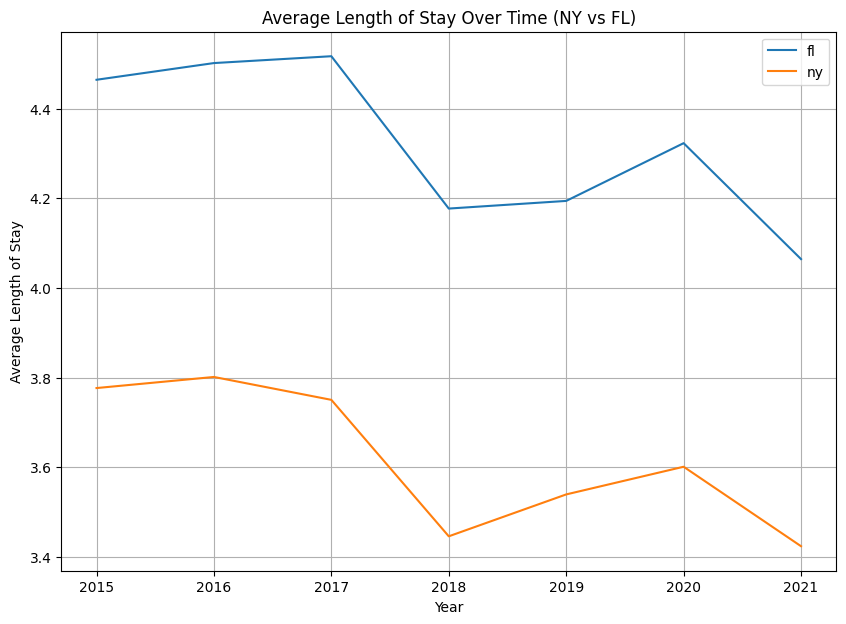

In [ ]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        select sum(tothrd)/count(*) as average_length_of_stay, year, state from Master
    where state = 'ny' or state = 'fl' group by state, year order by year;
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

    # Plot the data
    plt.figure(figsize=(10, 7))

    # Group data by state
    grouped = df.groupby('state')

    # Plot each group
    for state, data in grouped:
        plt.plot(data['year'], data['average_length_of_stay'], label=state)

    plt.xlabel('Year')
    plt.ylabel('Average Length of Stay')
    plt.title('Average Length of Stay Over Time (NY vs FL)')
    plt.legend()
    plt.grid(True)
    # Set y-axis range from 100 to 21
    plt.show()



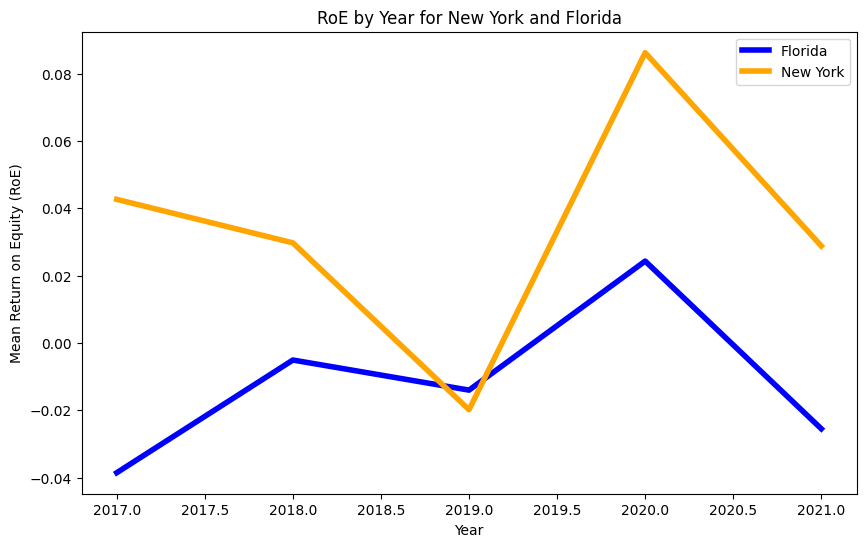

In [270]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
            AVG((net_income/(total_assets + total_liabilities))) AS median_operating_income,
            year,
            state
        FROM
            Master
        WHERE
            state IN ('ny', 'fl') 
            AND year in (2017,2018,2019,2020,2021)
            AND (net_income/(total_assets + total_liabilities)) > -.35
            AND (net_income/(total_assets + total_liabilities)) < .35
        GROUP BY
            state, year
        ORDER BY
            year;
    """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

    # Separate data by state
    fl_data = df[df['state'] == 'fl']
    ny_data = df[df['state'] == 'ny']

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot median operating income for Florida (blue)
    ax.plot(fl_data['year'], fl_data['median_operating_income'], label='Florida', color='blue', linewidth=4)

    # Plot median operating income for New York (orange)
    ax.plot(ny_data['year'], ny_data['median_operating_income'], label='New York', color='orange', linewidth=4)

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Return on Equity (RoE)')
    ax.set_title('RoE by Year for New York and Florida')

    # Show the legend
    ax.legend()

    # Show the plot
    plt.show()

In [ ]:
print(df)

      median_operating_income  year state             city
0                  35955988.0  2015    fl  new port richey
1                 128396045.0  2015    ny            bronx
2                    395093.0  2015    ny          dunkirk
3                  12462715.0  2015    ny          arverne
4                  31629580.0  2015    fl            ocala
...                       ...   ...   ...              ...
3173                 119379.0  2021    ny      morrisville
3174                3895956.0  2021    fl           destin
3175                2239812.0  2021    fl      green acres
3176                1235374.0  2021    fl          labelle
3177                -872330.0  2021    fl   fleming island

[3178 rows x 4 columns]


In [197]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
            ROUND(AVG(operating_income) * COUNT(*), 0) AS median_operating_income,
            ROUND(AVG(net_income) * COUNT(*), 0) AS net_income,
            year,
            state,
            city,
            AVG(snfs_in_city)
        FROM
            Master
        WHERE
            state IN ('ny', 'fl') 
            AND year in (2017,2018,2019,2020,2021)
            AND total_assets > 0
            AND total_liabilities > 0 
        GROUP BY
            state, city, year
        ORDER BY
            year;
        """
    

df = sql_executor.execute_query(query)
df.describe()

,median_operating_income,net_income,year,AVG(snfs_in_city)
count,2.270000e+03,2.270000e+03,2270.000000,2270.000000
mean,7.623815e+06,4.167435e+05,2019.001322,2.804405
std,2.584341e+07,7.866909e+06,1.414369,4.334166
min,-1.136389e+08,-9.464344e+07,2017.000000,1.000000
25%,4.855045e+05,-8.442080e+05,2018.000000,1.000000
50%,3.299507e+06,2.337640e+05,2019.000000,1.000000
75%,9.140689e+06,1.459223e+06,2020.000000,3.000000
max,3.905155e+08,1.324199e+08,2021.000000,43.000000


In [ ]:
print(df)

      median_operating_income  year state             city  AVG(snfs_in_city)
0                  14440065.0  2017    fl      gainesville                8.0
1                  35893078.0  2017    fl            ocala                9.0
2                 -21796616.0  2017    fl         sarasota               23.0
3                  43027989.0  2017    fl  west palm beach               11.0
4                  14821622.0  2017    fl          lecanto                3.0
...                       ...   ...   ...              ...                ...
2331                 119379.0  2021    ny      morrisville                1.0
2332                3895956.0  2021    fl           destin                1.0
2333                2239812.0  2021    fl      green acres                1.0
2334                1235374.0  2021    fl          labelle                1.0
2335                -872330.0  2021    fl   fleming island                1.0

[2336 rows x 5 columns]


In [207]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
            year,
            state,
            ROUND(AVG(gross_revenue) * COUNT(*), 0) AS gross_revenue,
            ROUND(AVG(total_operating_expense) * COUNT(*), 0) AS total_operating_expense,
            ROUND(AVG(net_income) * COUNT(*), 0) AS net_income,
            ROUND(AVG((tot_days / tot_bed_days_avail) * 100), 2) AS occupancy,
            SUM(num_beds)
        FROM
            Master
        WHERE
            state IN ('ny', 'fl')
            AND year IN (2018, 2019, 2020, 2021)
        GROUP BY
            state, year
        ORDER BY
            year;
        """
    

df = sql_executor.execute_query(query)

print(df)

   year state  gross_revenue  total_operating_expense   net_income  occupancy  \
0  2018    fl   1.096365e+10               91242252.0  -95641345.0      88.36   
1  2018    ny   1.583034e+10               68224228.0  109612551.0      93.74   
2  2019    fl   1.108990e+10               79050320.0    2331353.0      87.46   
3  2019    ny   1.615572e+10               70276242.0  227287759.0      94.82   
4  2020    fl   1.046905e+10               79682904.0  -10720451.0      79.01   
5  2020    ny   1.478679e+10               71126670.0 -288257468.0      82.87   
6  2021    fl   1.034949e+10               80650547.0 -332525921.0      77.58   
7  2021    ny   1.552035e+10               71615321.0  847604380.0      83.77   

   SUM(num_beds)  
0        86951.0  
1       102972.0  
2        85406.0  
3       102719.0  
4        86161.0  
5       108890.0  
6        84606.0  
7       103902.0  


In [ ]:
from myclasses.sql_executor import SQLExecutor

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT * FROM CovidVax
        """

    # Execute the query and get the result as a DataFrame
    vax_df = sql_executor.execute_query(query)

vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30411 entries, 0 to 30410
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   prov_id                    30411 non-null  object
 1   prov_state                 30411 non-null  object
 2   pct_residents_primary_vax  30411 non-null  object
 3   pct_staff_primary_vax      30411 non-null  object
 4   last_update                30411 non-null  object
 5   pct_residents_todate_vax   15147 non-null  object
 6   pct_staff_todate_vax       15147 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
from myclasses.sql_executor import SQLExecutor

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            (operating_income / ((total_assets + total_liabilities) * num_beds)) as roe,
            operating_income,
            gross_revenue,
            year,
            ownership,
            acct_payable,
            acct_rec,
            total_liabilities,
            tot_fund_balance,
            current_ratio,
            quick_ratio,
            pct_fixed_assets,
            pct_other_assets,
            (tot_days / tot_bed_days_avail) as fill_rate,
            cash,
            chow_last_12mos,
            region,
            state,
            state_lean,
            county_ssa,
            zip,
            tot_discharge_tot,
            def_score,
            fine_tot,
            fine_cnt,
            resfamcouncil,
            sprinkler_status,
            overall_rating,
            quality_rating,
            staffing_rating,
            rn_staffing_rating,
            aidhrd,
            vochrd,
            rnhrd,
            totlichrd,
            tothrd,
            pthrd,
            weighted_all_cycles_score,
            certification,
            snf_avg_stay_len_title_tot,
            pop_over_70,
            over_70_pct,
            has_outpatient,
            bedcert,
            fac_type,
            staff_style,
            totlichrd_to_tot
            
            
        FROM Master
        WHERE 
            roa > -1 
            AND roa < 1 
            AND total_assets > 0
            AND total_liabilities > 0 
            AND operating_income < 15000000 
            AND operating_income > -15000000
            AND gross_revenue < 80000000
            AND operating_income < 300000000
            AND (operating_income / ((total_assets  + total_liabilities) * num_beds)) < .5
            AND (operating_income / ((total_assets  + total_liabilities) * num_beds)) > -.5
        ORDER BY prov_id;
        """

    # Execute the query and get the result as a DataFrame
    roe = sql_executor.execute_query(query)

roe.describe()

,roe,operating_income,gross_revenue,year,acct_payable,acct_rec,total_liabilities,tot_fund_balance,current_ratio,quick_ratio,...,rnhrd,totlichrd,tothrd,pthrd,weighted_all_cycles_score,snf_avg_stay_len_title_tot,pop_over_70,over_70_pct,bedcert,totlichrd_to_tot
count,62230.000000,6.223000e+04,6.223000e+04,62230.000000,6.223000e+04,6.223000e+04,6.223000e+04,6.223000e+04,62230.000000,62230.000000,...,62230.000000,62230.000000,62230.000000,62230.000000,61791.000000,62230.000000,62230.000000,62230.000000,62230.000000,62230.000000
mean,0.095900,9.229137e+05,1.125656e+07,2018.142471,1.043200e+04,2.289097e+04,1.760742e+05,3.885328e+04,16.315484,10.649278,...,0.717623,1.581388,3.970331,0.084982,59.999422,2.172562,83383.798120,0.120123,0.959626,0.398037
std,0.179714,2.789501e+06,8.177047e+06,2.023361,4.979935e+04,1.251397e+05,7.365846e+05,3.233008e+05,2372.577500,2195.853569,...,0.400662,0.483408,0.869868,0.092759,68.365254,12.578852,167950.656378,0.030283,1.066348,0.071421
min,-0.499937,-1.499900e+07,-2.740000e+03,2015.000000,-2.538404e+05,-3.438439e+05,1.692434e-01,-1.005025e+07,-7359.016509,-7186.550314,...,0.000000,0.000000,1.503410,0.000000,0.000000,0.000004,139.000000,0.030065,0.000010,0.000000
25%,-0.010477,-1.075872e+05,5.806636e+06,2016.000000,1.735060e+03,6.557765e+03,1.292708e+04,-4.820244e+03,0.740018,0.009655,...,0.465570,1.300000,3.423682,0.032890,20.667000,0.727976,5882.000000,0.099888,1.000000,0.354324
50%,0.071062,6.327625e+05,9.152945e+06,2018.000000,3.623174e+03,1.017734e+04,3.034245e+04,9.025190e+03,1.321670,0.124987,...,0.642130,1.508450,3.826800,0.066175,40.000000,1.248264,21951.000000,0.116816,1.000000,0.395980
75%,0.213288,1.866713e+06,1.420777e+07,2020.000000,7.879764e+03,1.555954e+04,8.218412e+04,3.571065e+04,2.582680,0.678328,...,0.877722,1.761170,4.373577,0.106770,74.000000,2.328741,84179.000000,0.135020,1.000000,0.438039
max,0.499967,1.499058e+07,7.941304e+07,2022.000000,3.165168e+06,7.913870e+06,3.752557e+07,1.869957e+07,554139.333333,546469.166667,...,8.012500,9.983330,16.326920,3.320740,1442.330000,2987.234623,953730.000000,0.446093,200.000000,1.000005


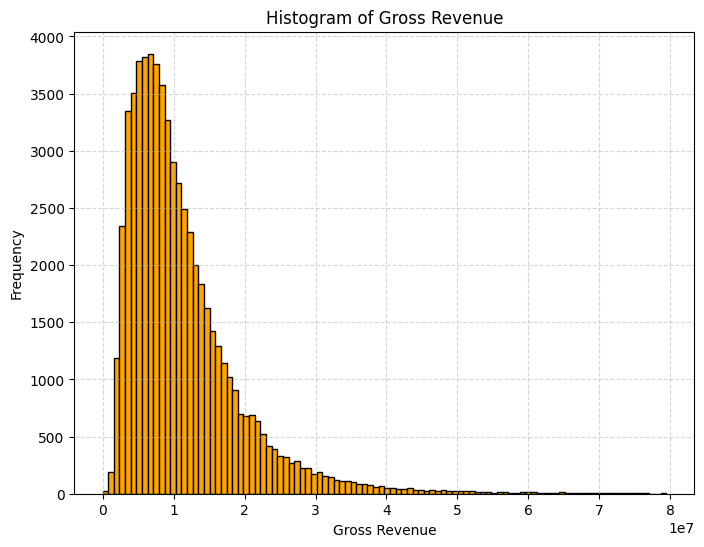

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))
plt.hist(roe['gross_revenue'], bins=100, color='orange', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Gross Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [217]:
from myclasses.sql_executor import SQLExecutor

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            prov_id, contract_labor, tot_salaries_adjusted, year
        FROM 
            Master
        WHERE
            state = 'fl' AND year in (2019,2020)
        ORDER BY prov_id, year;
        """

    # Execute the query and get the result as a DataFrame
    bristol = sql_executor.execute_query(query)

bristol.describe()

,contract_labor,tot_salaries_adjusted,year
count,444.000000,1.327000e+03,1327.000000
mean,6521.645303,5.729564e+06,2019.501884
std,39351.750195,3.085336e+06,0.500185
min,0.187726,4.972500e+04,2019.000000
25%,434.055544,3.994218e+06,2019.000000
50%,2648.154167,5.052796e+06,2020.000000
75%,6476.618346,6.744990e+06,2020.000000
max,825561.760417,4.456847e+07,2020.000000


      contract_labor  tot_salaries_adjusted
year                                       
2019    0.000000e+00           3.826275e+09
2020    2.895611e+06           3.776856e+09


KeyError: '2019'

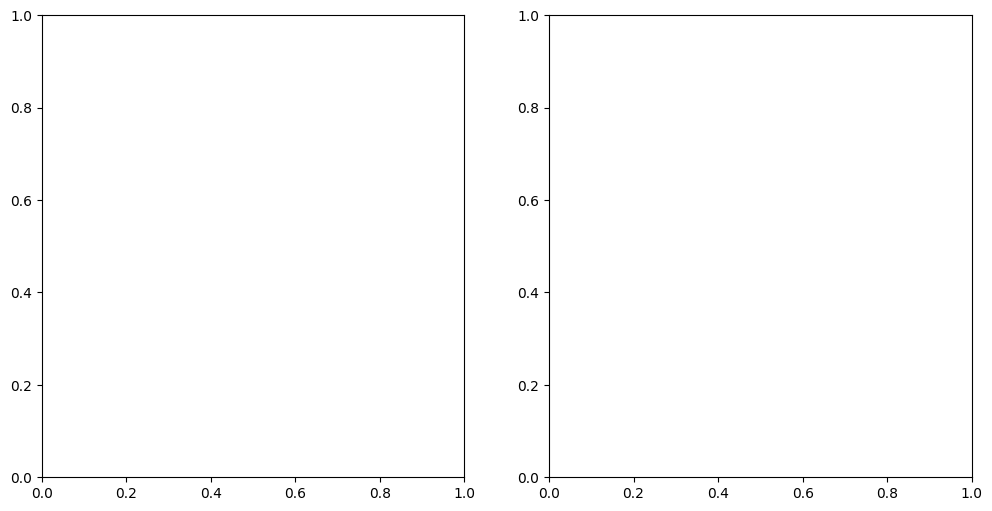

In [220]:
# Calculate the sum of 'contract_labor' and 'tot_salaries_adjusted' for each year
sum_by_year = bristol.groupby('year')[['contract_labor', 'tot_salaries_adjusted']].sum()

print(sum_by_year)

# Plot a pie chart for each year
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots for each year

for i, year in enumerate(['2019', '2020', '2021']):
    ax = axes[i]
    year_data = sum_by_year.loc[year]
    ax.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Year {year}')

plt.suptitle('Distribution of Contract Labor and Total Adjusted Salaries for 2019 and 2020')
plt.show()

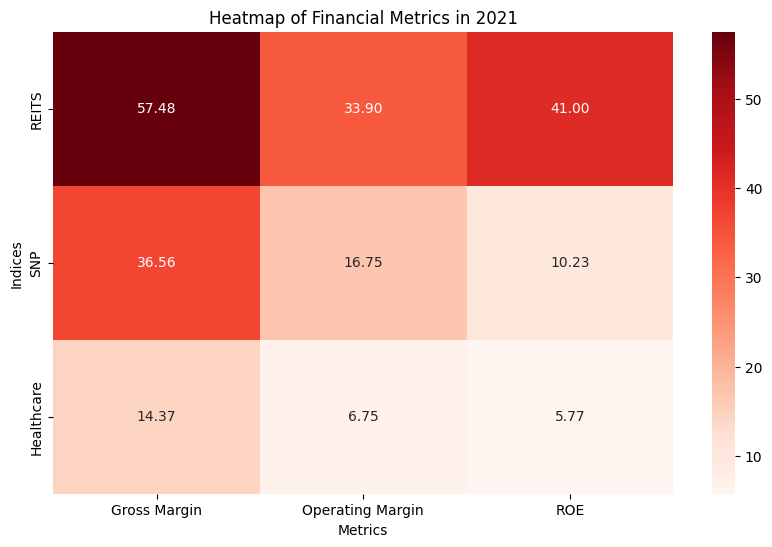

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
                    'Index' : ['REITS','SNP','Healthcare'],
                    'Gross Margin': [57.48,36.56,14.37],
                    'Operating Margin': [33.9,16.75,6.75],
                    'ROE': [41, 10.23, 5.77]
                    
})

# Set the 'Index' column as index
df.set_index('Index', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='Reds', annot=True, fmt=".2f")
plt.title('Heatmap of Financial Metrics in 2021')
plt.xlabel('Metrics')
plt.ylabel('Indices')
plt.show()

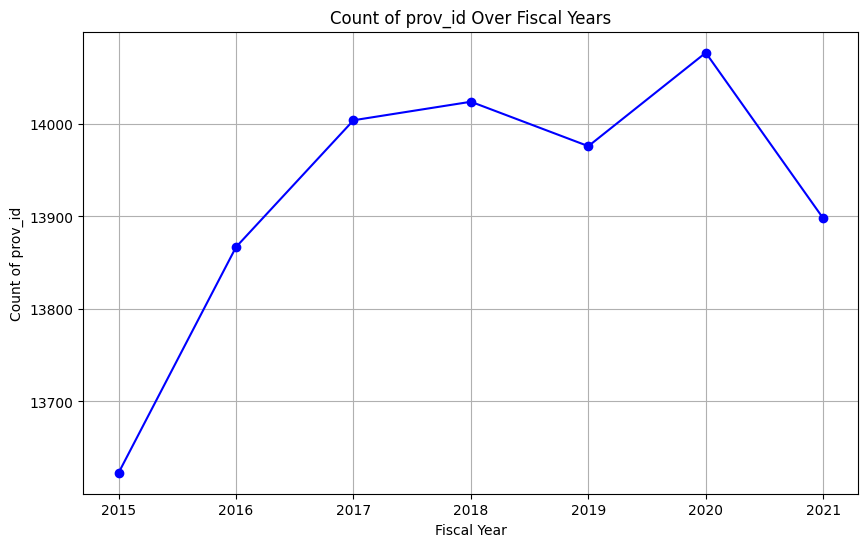

In [ ]:
# Provided data
counts = [13623, 13867, 14004, 14024, 13976, 14077, 13898]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', color='b', linestyle='-')
plt.title('Count of prov_id Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Count of prov_id')
plt.grid(True)
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.show()

In [342]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
                state,
                prov_id,
                year,
                (staffing_rating + (tothrd) + (aidhrd * .05) + (rnhrd)) as staffing_score,
                (profit_margin) as profitability,
                quick_ratio as liquidity,
                quality_rating
         
           from Master WHERE state in ('ny','fl') AND profit_margin > -.5 AND profit_margin < .5  AND year in (2015, 2016,2017,2018,2019) AND quick_ratio > -1 AND quick_ratio < 1
           ;
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)


In [336]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
                state,
                prov_id,
                year,
                (staffing_rating + (tothrd) + (aidhrd * .05) + (rnhrd)) as staffing_score,
                (net_income / num_beds) as profitability,
                quick_ratio as liquidity,
                quality_rating
         
           from Master WHERE profit_margin > -1 AND profit_margin < 1 AND year in (2015, 2016,2017,2018,2019) AND quick_ratio > -1 AND quick_ratio < 1
           ;
        """

    # Execute the query and get the result as a DataFrame
    df2 = sql_executor.execute_query(query)

# Pivot the data
pivot_df = df2.pivot_table(index='state', columns='year', values='profitability')

# Calculate the average staffing score across all states
average_staffing_by_year = pivot_df.mean()

# Transpose the DataFrame to have years as column headers
average_staffing_by_year = average_staffing_by_year.to_frame().T

# Rename the index label for "national"
average_staffing_by_year.index = ['national']

print("Average Staffing Score by Year:")
print(average_staffing_by_year)

Average Staffing Score by Year:
year             2015        2016         2017        2018        2019
national -1184.742587  622.680154 -1190.014221 -1430.17356 -231.965983


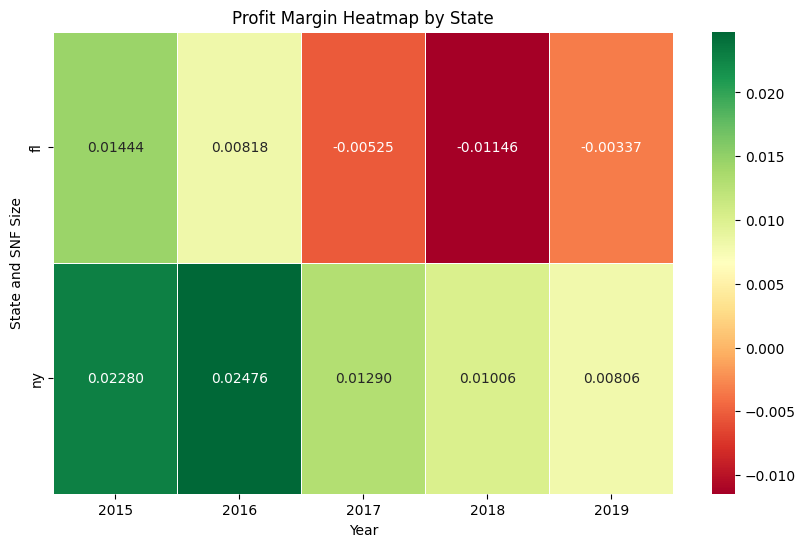

In [344]:
# Pivot the data on 'state' with 'snf_size' as the columns
pivot_df = df.pivot_table(index=['state'], columns='year', values='profitability')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, fmt=".5f", linewidths=.5)
plt.title('Profit Margin Heatmap by State')
plt.xlabel('Year')
plt.ylabel('State and SNF Size')
plt.show()

In [352]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
                state,
                net_income,
                (net_income/(total_assets + total_liabilities))
                profit_margin,
                operating_margin


        FROM
                Master
        WHERE
                year = 2019
            AND
                state = 'ny'
            AND
                city = 'bronx'
                
                
            """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

df.describe()


,net_income,profit_margin,operating_margin
count,4.100000e+01,41.000000,41.000000
mean,9.266811e+05,9.201472,-0.864368
std,2.042311e+06,18.324569,0.272859
min,-3.410966e+06,-21.657686,-2.296436
25%,-9.204500e+04,-1.184681,-0.920584
50%,5.284740e+05,4.037121,-0.839634
75%,1.667016e+06,14.338797,-0.764301
max,7.283031e+06,68.140067,-0.447247


In [345]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
            year,
            AVG(rn_staffing_rating) as avg_rn_staffing_rating,
            AVG(staffing_rating) AS avg_staffing_rating,
            AVG(overall_rating) AS avg_overall_rating,
            AVG(quality_rating) AS avg_quality_rating
        FROM 
            Master 
        WHERE 
            state = 'ny' 
            AND profit_margin > -1 
            AND profit_margin < 1 
            AND year BETWEEN 2015 AND 2020 
            AND quick_ratio > -1 
            AND quick_ratio < 1
        GROUP BY 
            year
        ORDER BY
            year;
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

df.describe()

,year,avg_rn_staffing_rating,avg_staffing_rating,avg_overall_rating,avg_quality_rating
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2017.500000,2.672383,2.469168,3.155582,4.015621
std,1.870829,0.228301,0.150457,0.137257,0.348980
min,2015.000000,2.436831,2.342857,2.987179,3.507692
25%,2016.250000,2.570648,2.375419,3.068045,3.773779
50%,2017.500000,2.626572,2.397925,3.140388,4.146173
75%,2018.750000,2.673127,2.538114,3.227696,4.223435
max,2020.000000,3.103672,2.723542,3.364807,4.394850


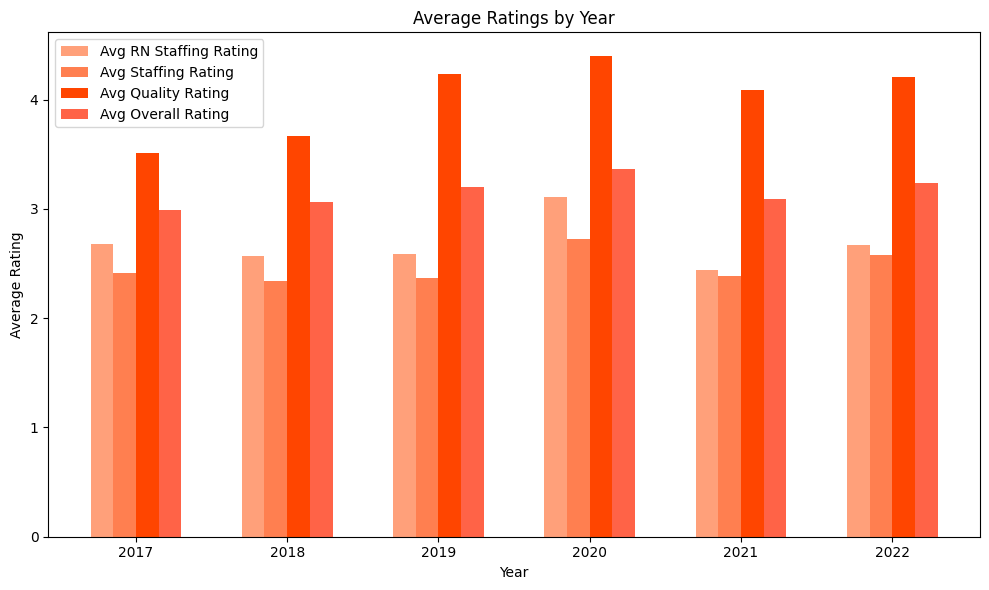

In [237]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting each bar with orangish colors
plt.bar(years, df['avg_rn_staffing_rating'], color='#FFA07A', label='Avg RN Staffing Rating', width=0.15)
plt.bar([year + 0.15 for year in years], df['avg_staffing_rating'], color='#FF7F50', label='Avg Staffing Rating', width=0.15)
plt.bar([year + 0.30 for year in years], df['avg_quality_rating'], color='#FF4500', label='Avg Quality Rating', width=0.15)
plt.bar([year + 0.45 for year in years], df['avg_overall_rating'], color='#FF6347', label='Avg Overall Rating', width=0.15)


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Year')
plt.xticks([year + 0.225 for year in years], years)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [238]:
from myclasses.sql_executor import SQLExecutor
import matplotlib.pyplot as plt
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT
            year,
            AVG(rn_staffing_rating) as avg_rn_staffing_rating,
            AVG(staffing_rating) AS avg_staffing_rating,
            AVG(overall_rating) AS avg_overall_rating,
            AVG(quality_rating) AS avg_quality_rating
        FROM 
            Master 
        WHERE 
            state = 'fl' 
            AND profit_margin > -1 
            AND profit_margin < 1 
            AND year BETWEEN 2015 AND 2020 
            AND quick_ratio > -1 
            AND quick_ratio < 1
        GROUP BY 
            year
        ORDER BY
            year;
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

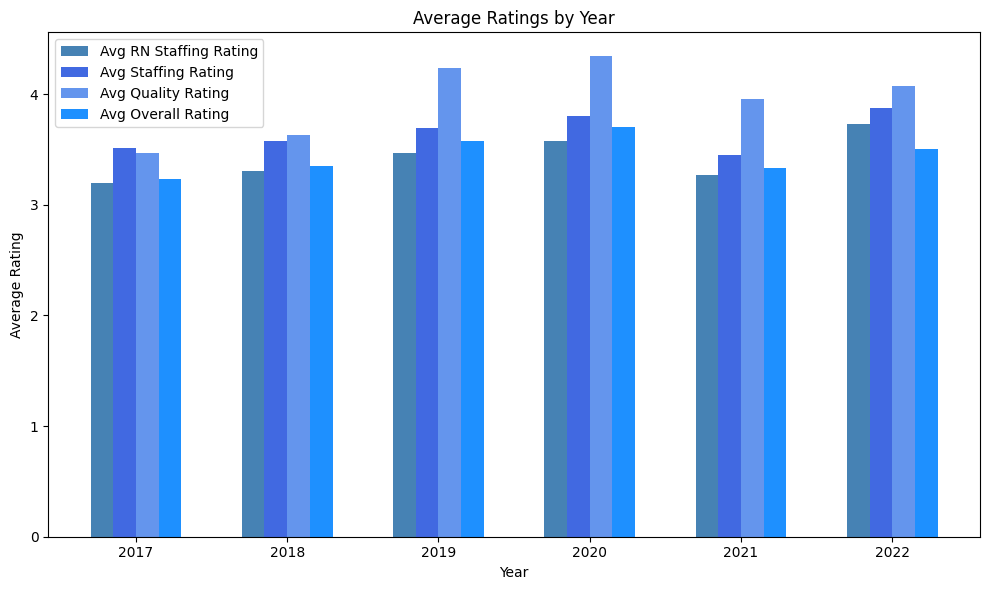

In [239]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting each bar with shades of blue
plt.bar(years, df['avg_rn_staffing_rating'], color='#4682B4', label='Avg RN Staffing Rating', width=0.15)
plt.bar([year + 0.15 for year in years], df['avg_staffing_rating'], color='#4169E1', label='Avg Staffing Rating', width=0.15)
plt.bar([year + 0.30 for year in years], df['avg_quality_rating'], color='#6495ED', label='Avg Quality Rating', width=0.15)
plt.bar([year + 0.45 for year in years], df['avg_overall_rating'], color='#1E90FF', label='Avg Overall Rating', width=0.15)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Year')
plt.xticks([year + 0.225 for year in years], years)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

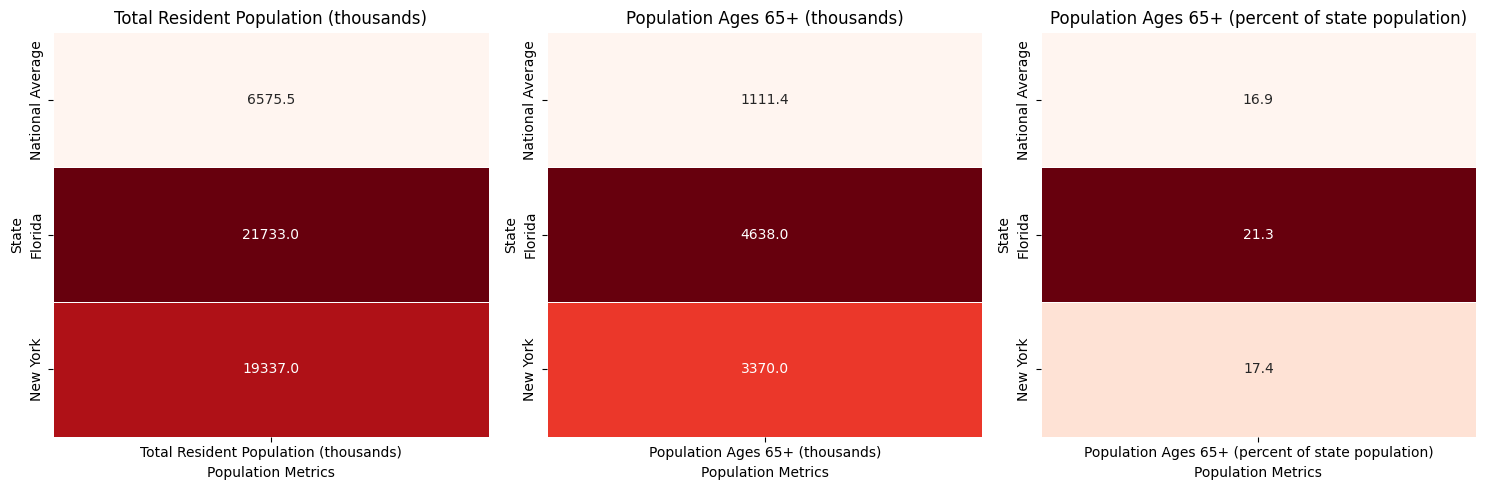

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/home/josh/Downloads/States Ranked by Percent of Population Age 65 or Older, 2020.csv")



# Set 'State' column as index
data.set_index('State', inplace=True)

# Plot each column as a separate heatmap
plt.figure(figsize=(15, 5))

for i, column in enumerate(data.columns):
    plt.subplot(1, 3, i+1)
    sns.heatmap(data[[column]], cmap='Reds', annot=True, fmt=".1f", linewidths=.5, cbar=False)
    plt.title(column)
    plt.xlabel('Population Metrics')
    plt.ylabel('State')

plt.tight_layout()
plt.show()
